In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
steps = 200
lr = 0.02
loss = 0
figsize = [30, 15]
alphas = [0.2, 0.5, 1, 2]
alphas_new = [0.004, 0.01, 0.02, 0.04]


Lab1-B

In [35]:
# calculate the loss of each step
def cal_sum(x, w, y):
	loss = np.sum((x.dot(w) - y) ** 2)
 
	return loss, (x, w, y, x.dot(w))
 
# update the weight after each step
def cal_weight(loss, data):
	x, w, y, x_w = data
	dw = 2 * x.T.dot((x_w - y)) 	
	w = w - lr * dw 

	return w

# update the loss after each step 
def update_train(w, x, y):
  loss_list, w_list = [], []
  for step in range(steps):
    loss, data = cal_sum(x, w, y)
    w = cal_weight(loss, data)
    loss_list.append(np.log(loss))
    w_list.append(w)

  return loss_list, w_list


In [39]:
x = np.array([[1, -2, -1, -1, 1], [2, -1, 2, 0, -2], [-1, 0, 2, 2, 1]])
y = np.array([[7], [1], [1]])
w = np.array([[0], [0], [0], [0], [0]])
loss_list, w_list = update_train(w, x, y)

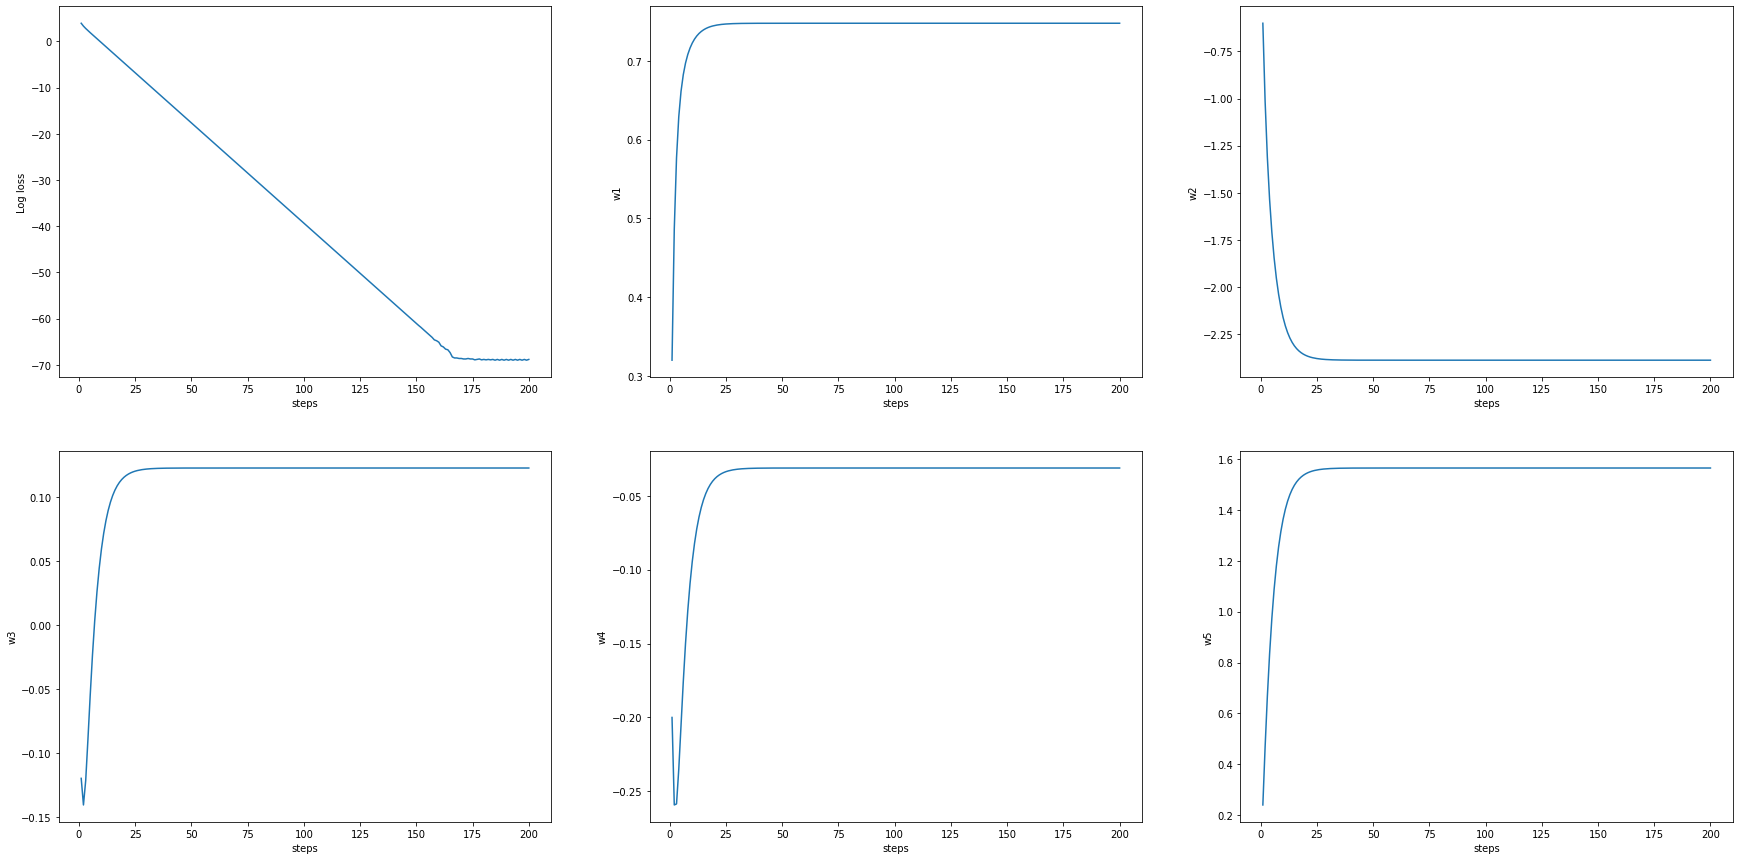

In [47]:
def plot_image(loss_list, w_list):
  w1 = [ w[0] for w in w_list ]
  w2 = [ w[1] for w in w_list ] 
  w3 = [ w[2] for w in w_list ] 
  w4 = [ w[3] for w in w_list ]
  w5 = [ w[4] for w in w_list ]

  plt.figure(figsize = figsize)
  
  plt.subplot(231)
  plt.plot(np.arange(1, steps + 1), loss_list)
  plt.xlabel('steps')
  plt.ylabel('Log loss')

  plt.subplot(232)
  plt.plot(np.arange(1, steps + 1), w1)
  plt.xlabel('steps')
  plt.ylabel('w1')

  plt.subplot(233)
  plt.plot(np.arange(1, steps + 1), w2)
  plt.xlabel('steps')
  plt.ylabel('w2')

  plt.subplot(234)
  plt.plot(np.arange(1, steps + 1), w3)
  plt.xlabel('steps')
  plt.ylabel('w3')

  plt.subplot(235)
  plt.plot(np.arange(1, steps + 1), w4)
  plt.xlabel('steps')
  plt.ylabel('w4')

  plt.subplot(236)
  plt.plot(np.arange(1, steps + 1), w5)
  plt.xlabel('steps')
  plt.ylabel('w5')
  
  plt.show()

plot_image(loss_list, w_list)

Lab1-C

In [57]:
# calculate the loss with pruning
def pruning(w, n = 2):
  sorted_w = sorted(w)
  for i in range(n):
    element = sorted_w[i]
    row, col = np.where(w == element)
    w[row, col] = 0
  return w

# calculate the weight with pruning
def cal_weight_prune(loss, data, prune = False):
  x, w, y, x_w = data
  dw = 2 * x.T.dot((x_w - y)) 		
  w = w - lr * dw 
  if prune:
    w = pruning(w)
  return w

#update the weight with pruning data
def training_prune(w, x, y, prune = False):
  loss_list, w_list = [], []
  for i in range(steps):
    loss, data = cal_sum(x, w, y)
    w = cal_weight_prune(loss, data, prune = prune)
    loss_list.append(np.log(loss))
    w_list.append(w)

  return loss_list, w_list

In [58]:
w = np.array([[0], [0], [0], [0], [0]])
loss_list, w_list = training_prune(w, x, y, True)

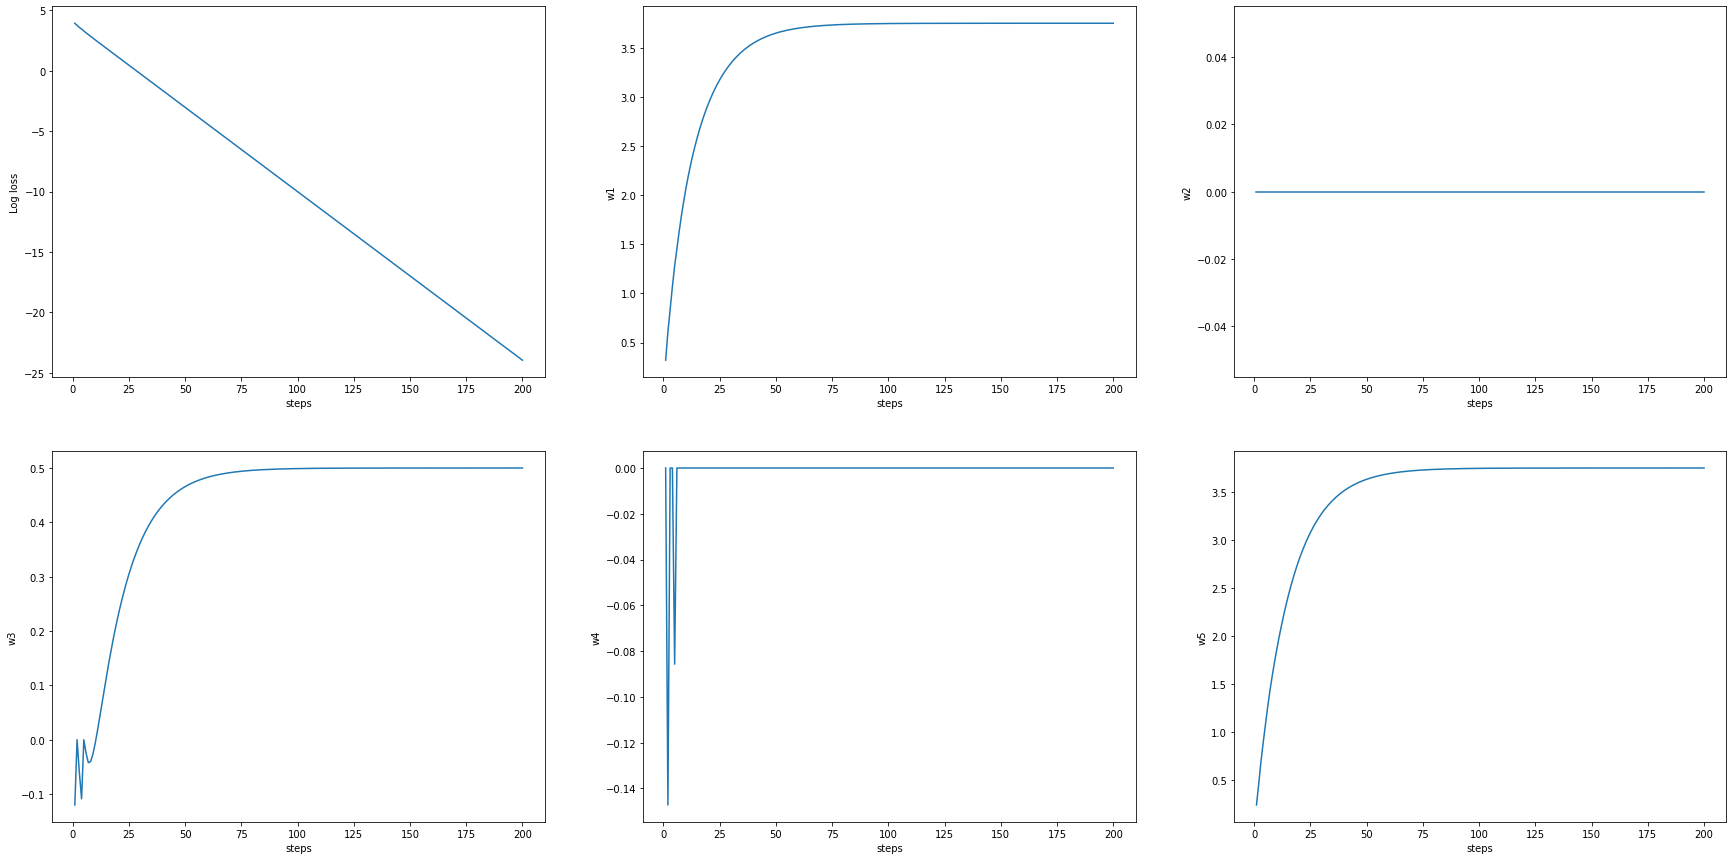

In [59]:
plot_image(loss_list, w_list)

Lab1-D


In [55]:
#calculate the loss with alpha
def cal_sum_alpha(x, w, y, alpha = None):
	loss = 0
	x_w = x.dot(w)
	sum_ = np.sum((x_w - y)**2)
	loss = sum_ + alpha * np.sum(np.absolute(w))
 
	return sum_, (x, w, y, x_w, alpha)
 
# calculate the weight with alpha
def cal_weight_alpha(loss, data):
	x, w, y, x_w, alpha = data
	dw = 2 * x.T.dot((x_w - y)) + alpha * len(w)		
	w = w - lr * dw

	return w

# update the weight with alpha data
def training_alpha(w, x, y, alpha):
  loss_list, w_list = [], []
  for i in range(steps):
    loss, data = cal_sum_alpha(x, w, y, alpha = alpha)
    w = cal_weight_alpha(loss, data)
    loss_list.append(np.log(loss))
    w_list.append(w)

  return loss_list, w_list

Alpha =  0.2


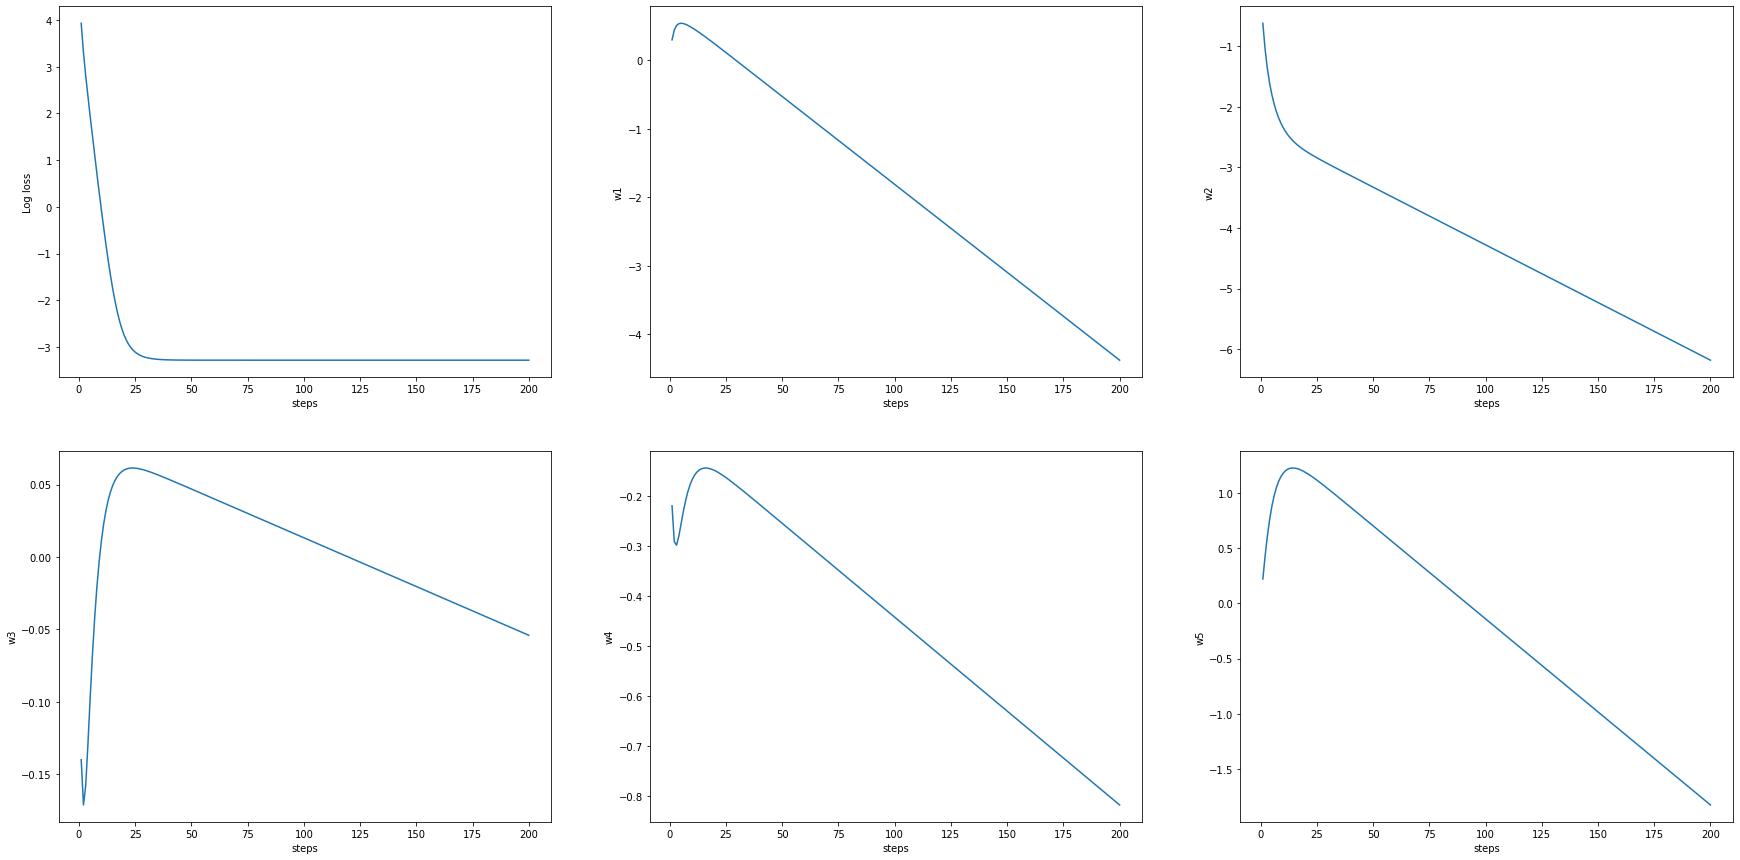


Alpha =  0.5


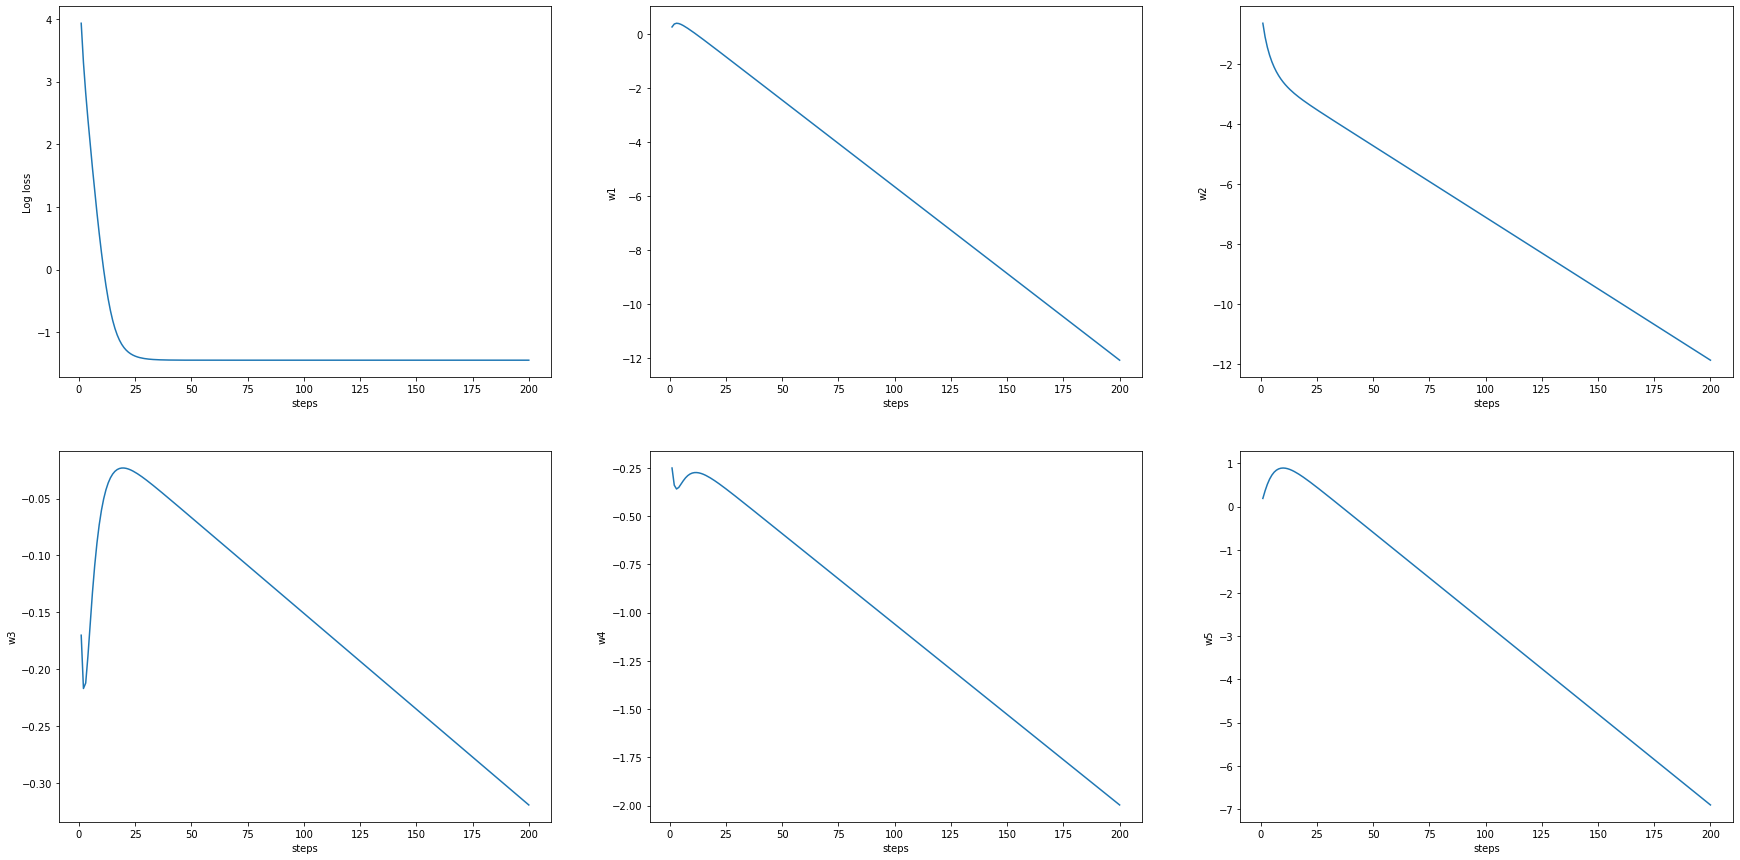


Alpha =  1


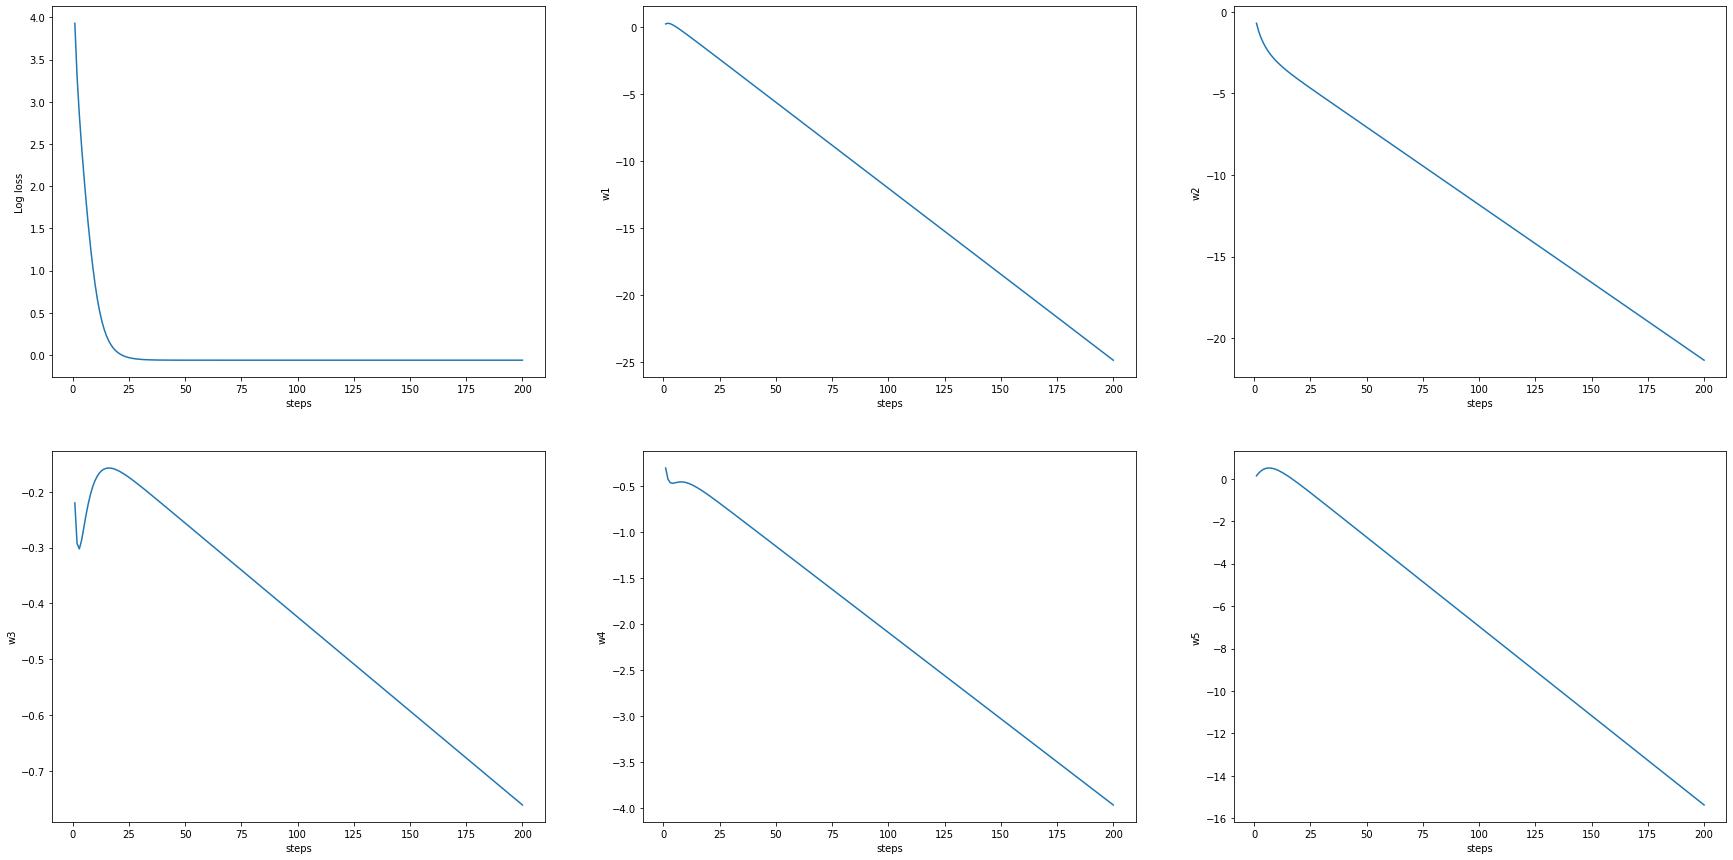


Alpha =  2


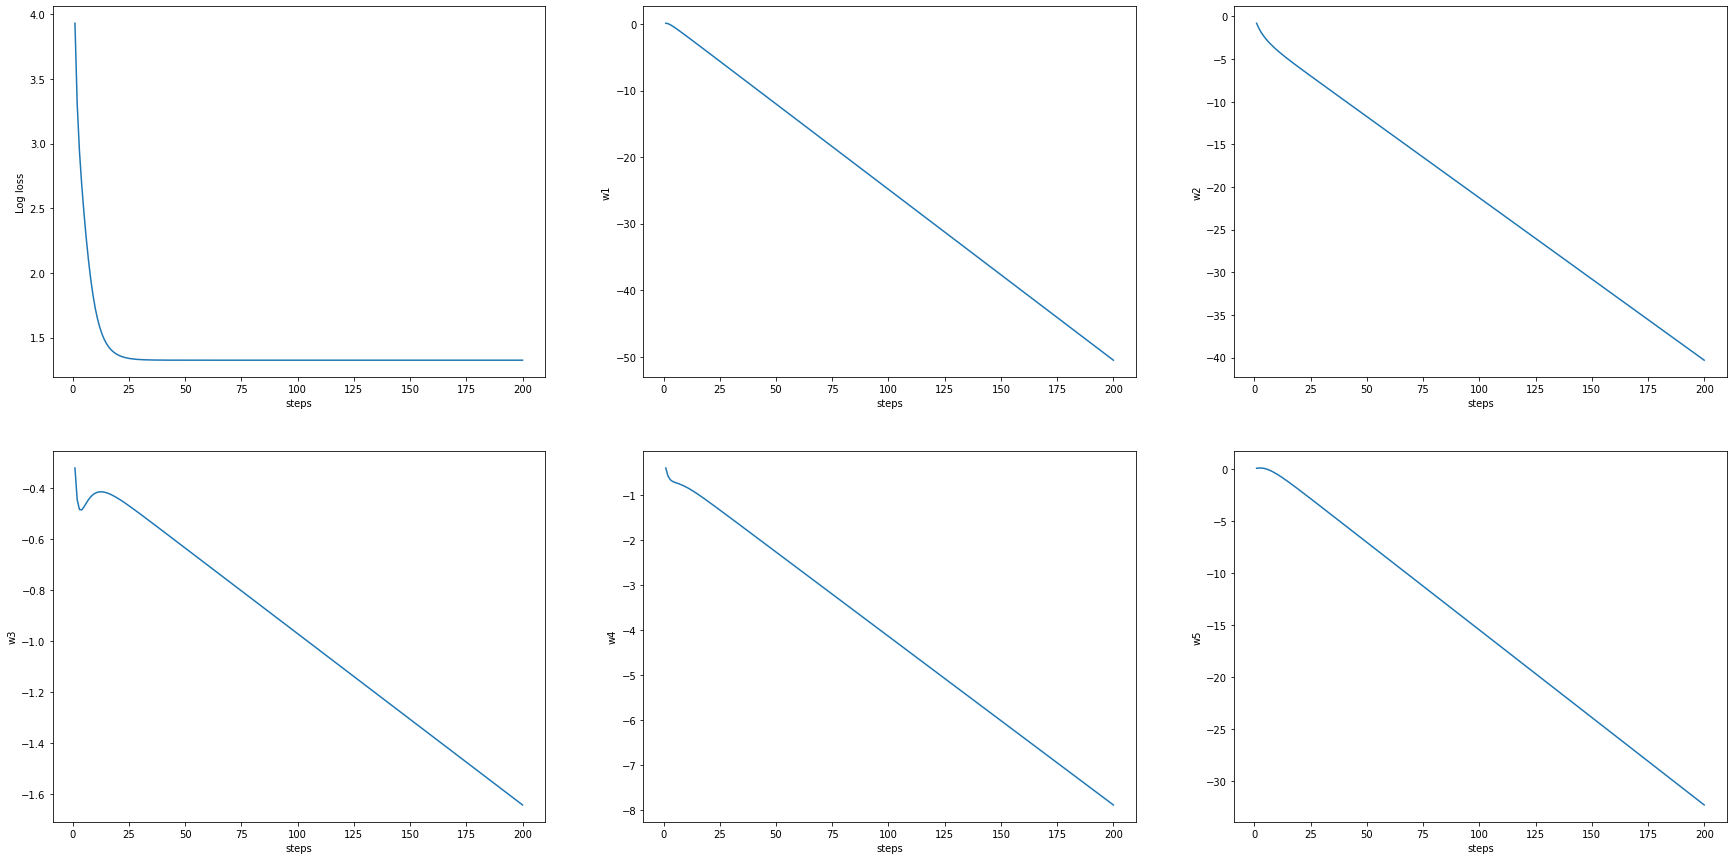

In [56]:
for a in alphas:
  print("Alpha = ", a)
  w = np.array([[0], [0], [0], [0], [0]])
  loss_list, w_list = training_alpha(w, x, y, a)
  plot_image(loss_list, w_list)
  print('')

Lab1-E

In [63]:
# calculate loass with new alpha
def cal_sum_alpha_new(x, w, y, alpha = None):
  loss = 0
  x_w = x.dot(w)
  sum_ = np.sum((x_w - y)**2)
  loss = sum_ + alpha * np.sum(np.absolute(w))

  return sum_, (x, w, y, x_w, alpha)

#calculate weight with new alpha
def cal_weight_alpha_new(loss, data, alpha):
  x, w, y, x_w, alpha = data
  dw = 2 * x.T.dot((x_w - y))
  w = w - alpha * dw 

  return w  

#update weight with new alpha
def training_alpha_new(w, x, y, alpha):
  loss_list, w_list = [], []
  for i in range(steps):
    loss, data = cal_sum_alpha_new(x, w, y, alpha = alpha)
    w = cal_weight_alpha_new(loss, data, alpha)
    loss_list.append(np.log(loss))
    w_list.append(w)

  return loss_list, w_list

threshold for projections =  0.004


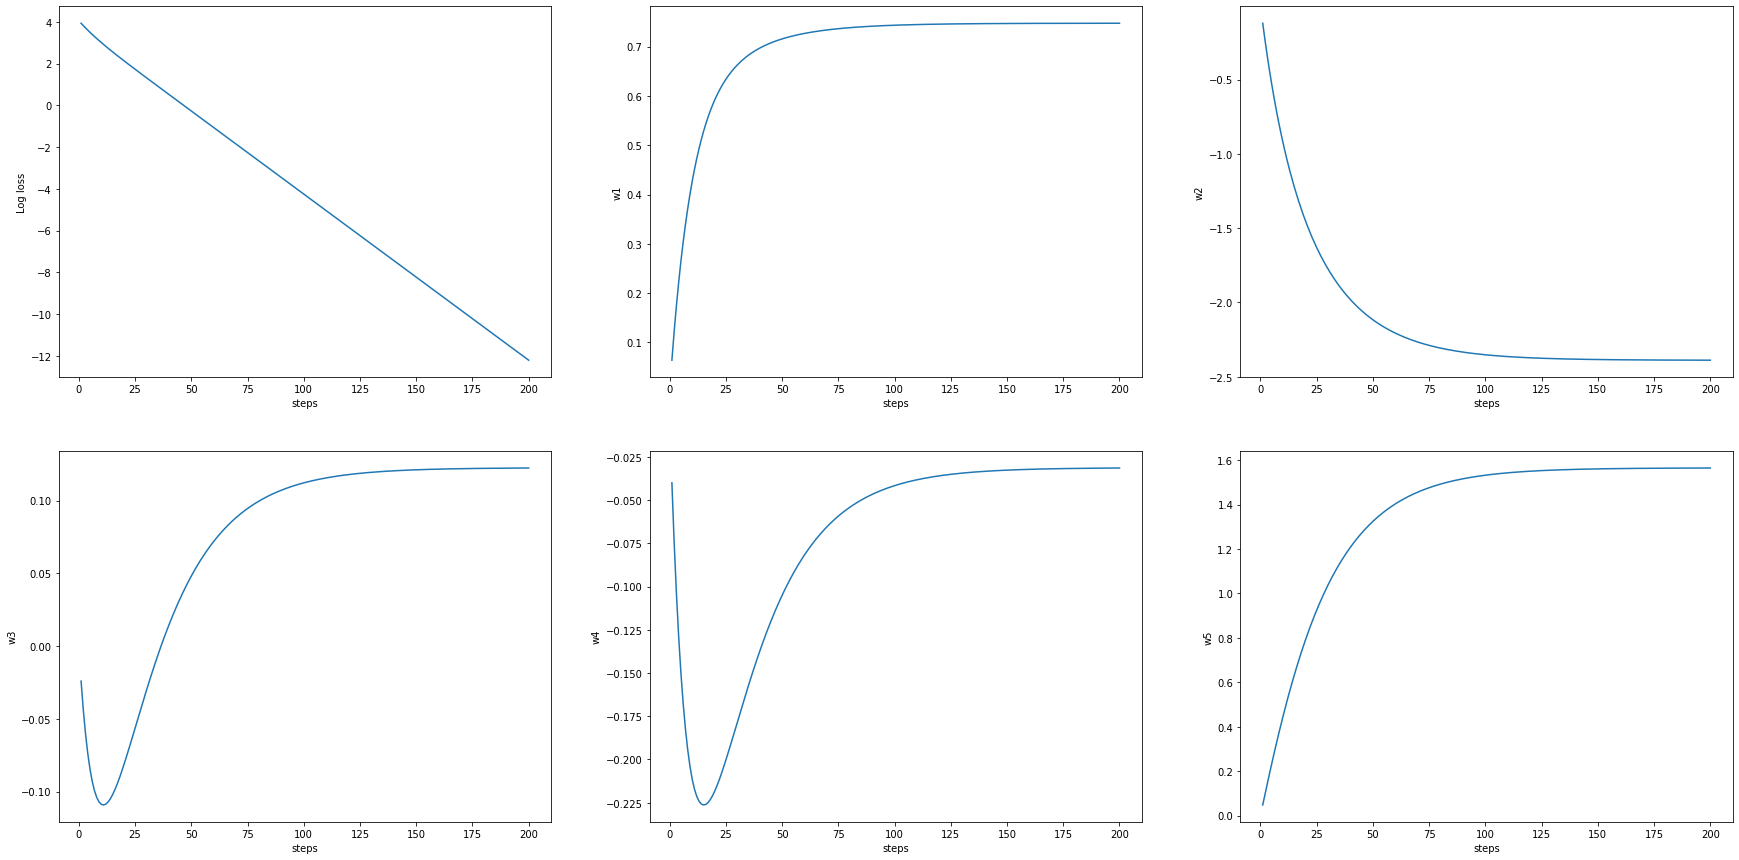


threshold for projections =  0.01


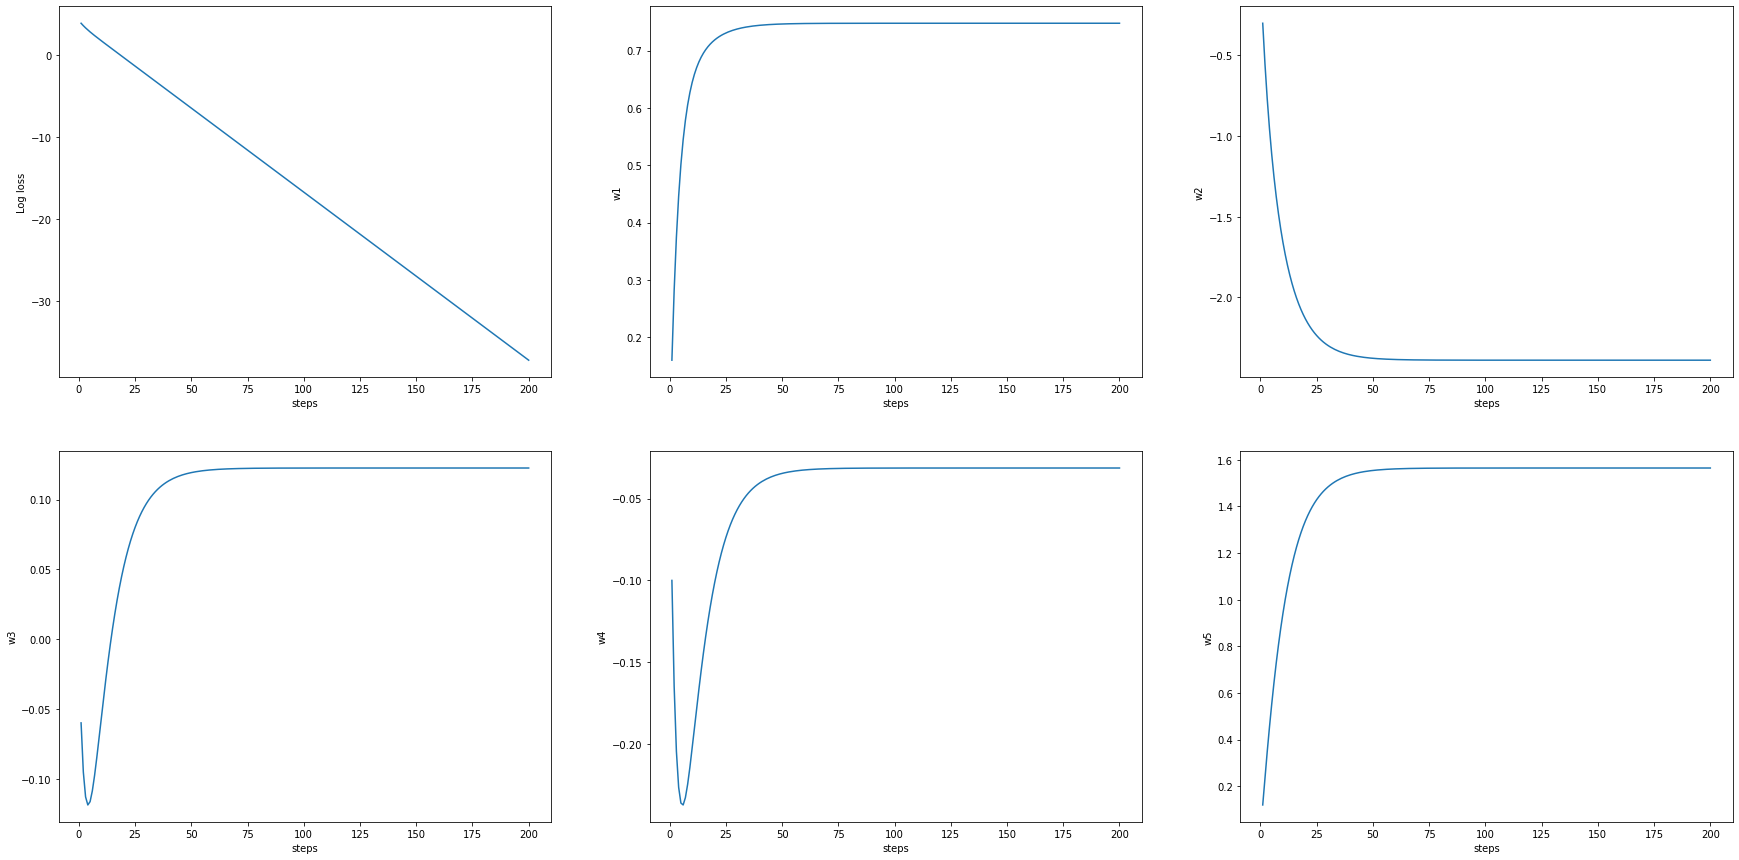


threshold for projections =  0.02


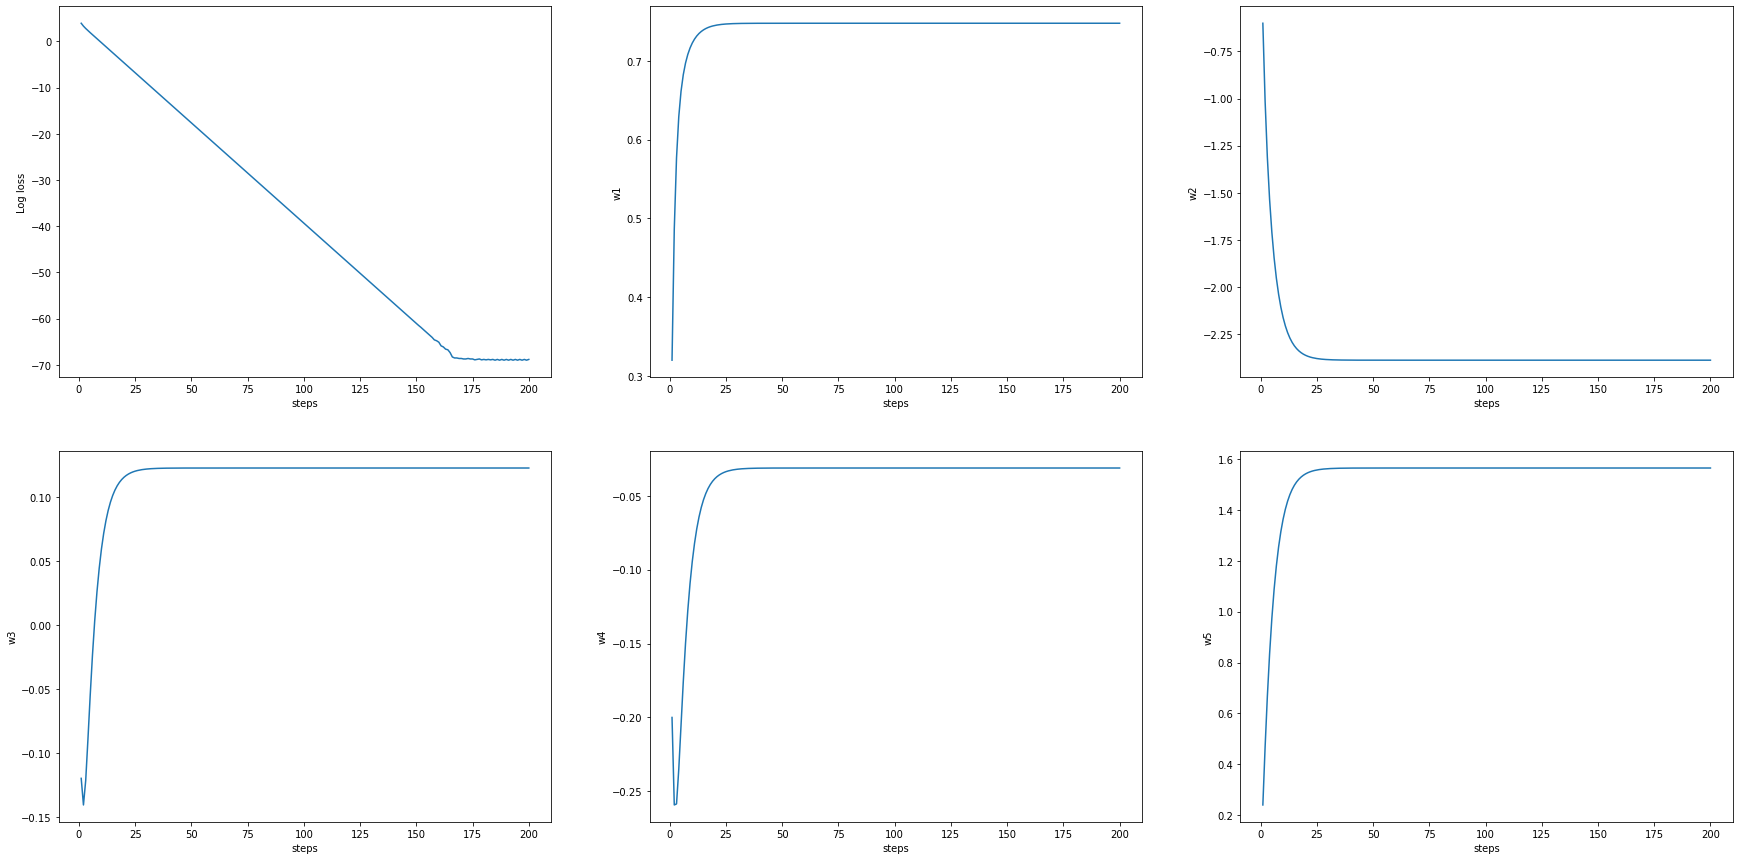


threshold for projections =  0.04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


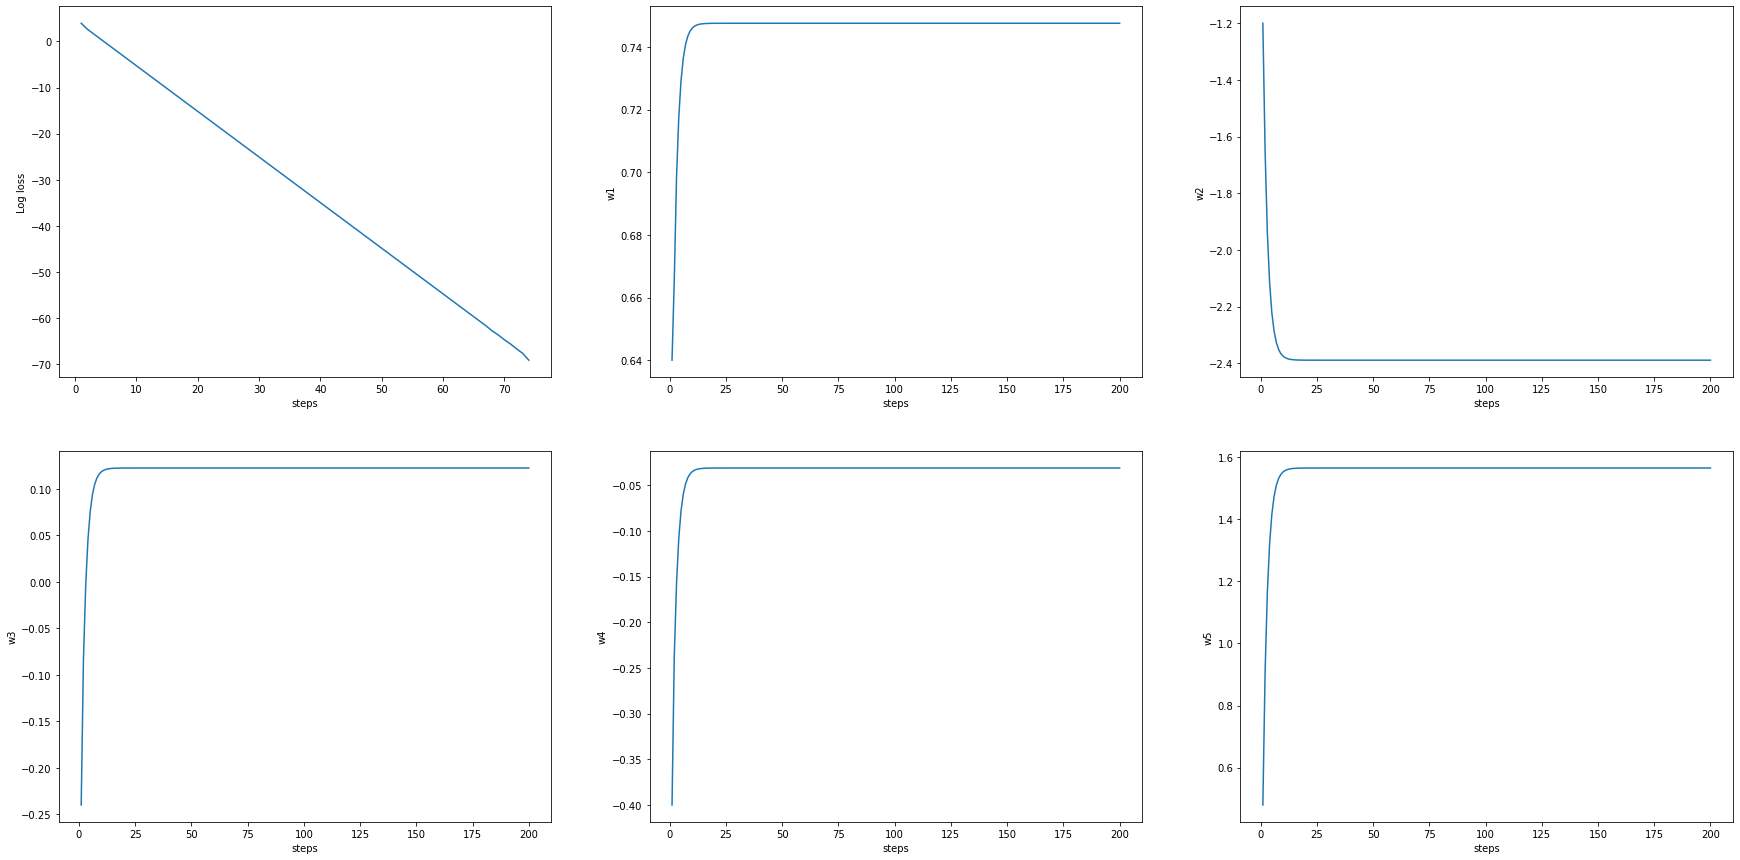

In [64]:
for a in alphas_new:
  print("threshold for projections = ", a)
  w = np.array([[0], [0], [0], [0], [0]])
  loss_list, w_list = training_alpha_new(w, x, y, a)
  plot_image(loss_list, w_list)
  print('')

Lab1-F
